In [1]:
import numpy as np
import pandas
import scanpy
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
import scanpy.plotting as scp
import seaborn as sns
from collections import defaultdict
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


scanpy==1.4 anndata==0.6.18 numpy==1.16.1 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
df = anndata.read("./write/tgfb1-3-batch2.h5ad")

In [3]:
df

AnnData object with n_obs × n_vars = 7058 × 1346 
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'cVSMC signature', 'ALK5 signature', 'ALK1 signature'
    var: 'gene_names', 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [4]:
print (df, 'louvain')

AnnData object with n_obs × n_vars = 7058 × 1346 
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'cVSMC signature', 'ALK5 signature', 'ALK1 signature'
    var: 'gene_names', 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'louvain', 'louvain_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs' louvain


In [5]:
len ('louvain')

7

In [6]:
scanpy.set_figure_params(scanpy=True, dpi=600, dpi_save=600, frameon=True, vector_friendly=True, fontsize=14, color_map=None, format='pdf', transparent=False, ipython_format='png2x')

# The heatmap is commented out

In [7]:
# sc.pl.heatmap(df, ['SERPINE1', 'CTGF', 'FGF2', 'ACTA2', 'TRIB3', 'PLAUR', 'ID3', 'SCARA3', 'ID1','HMGA1'], groupby='louvain')

In [8]:
import collections

In [9]:
df.obs["louvain"].to_list()

['5',
 '1',
 '1',
 '6',
 '4',
 '7',
 '1',
 '6',
 '0',
 '0',
 '1',
 '7',
 '1',
 '0',
 '2',
 '0',
 '1',
 '0',
 '5',
 '0',
 '1',
 '4',
 '5',
 '0',
 '6',
 '6',
 '0',
 '6',
 '4',
 '5',
 '1',
 '1',
 '6',
 '1',
 '0',
 '4',
 '5',
 '3',
 '4',
 '7',
 '5',
 '1',
 '2',
 '4',
 '5',
 '0',
 '7',
 '0',
 '2',
 '5',
 '1',
 '8',
 '2',
 '1',
 '4',
 '0',
 '5',
 '1',
 '4',
 '6',
 '4',
 '2',
 '1',
 '1',
 '7',
 '2',
 '5',
 '2',
 '6',
 '1',
 '3',
 '5',
 '2',
 '7',
 '1',
 '1',
 '2',
 '7',
 '3',
 '1',
 '1',
 '5',
 '5',
 '4',
 '2',
 '4',
 '5',
 '5',
 '3',
 '8',
 '2',
 '3',
 '6',
 '6',
 '3',
 '4',
 '3',
 '1',
 '5',
 '4',
 '5',
 '5',
 '6',
 '3',
 '1',
 '2',
 '0',
 '6',
 '7',
 '1',
 '5',
 '5',
 '4',
 '3',
 '1',
 '4',
 '3',
 '1',
 '5',
 '0',
 '0',
 '4',
 '7',
 '4',
 '1',
 '2',
 '1',
 '0',
 '4',
 '1',
 '3',
 '4',
 '7',
 '4',
 '4',
 '6',
 '4',
 '6',
 '3',
 '4',
 '1',
 '0',
 '0',
 '3',
 '7',
 '3',
 '1',
 '4',
 '7',
 '1',
 '2',
 '5',
 '4',
 '1',
 '1',
 '1',
 '0',
 '6',
 '1',
 '8',
 '4',
 '5',
 '5',
 '1',
 '2',
 '4',
 '3'

In [10]:
clusters = df.obs["louvain"].to_list()

In [11]:
clusters

['5',
 '1',
 '1',
 '6',
 '4',
 '7',
 '1',
 '6',
 '0',
 '0',
 '1',
 '7',
 '1',
 '0',
 '2',
 '0',
 '1',
 '0',
 '5',
 '0',
 '1',
 '4',
 '5',
 '0',
 '6',
 '6',
 '0',
 '6',
 '4',
 '5',
 '1',
 '1',
 '6',
 '1',
 '0',
 '4',
 '5',
 '3',
 '4',
 '7',
 '5',
 '1',
 '2',
 '4',
 '5',
 '0',
 '7',
 '0',
 '2',
 '5',
 '1',
 '8',
 '2',
 '1',
 '4',
 '0',
 '5',
 '1',
 '4',
 '6',
 '4',
 '2',
 '1',
 '1',
 '7',
 '2',
 '5',
 '2',
 '6',
 '1',
 '3',
 '5',
 '2',
 '7',
 '1',
 '1',
 '2',
 '7',
 '3',
 '1',
 '1',
 '5',
 '5',
 '4',
 '2',
 '4',
 '5',
 '5',
 '3',
 '8',
 '2',
 '3',
 '6',
 '6',
 '3',
 '4',
 '3',
 '1',
 '5',
 '4',
 '5',
 '5',
 '6',
 '3',
 '1',
 '2',
 '0',
 '6',
 '7',
 '1',
 '5',
 '5',
 '4',
 '3',
 '1',
 '4',
 '3',
 '1',
 '5',
 '0',
 '0',
 '4',
 '7',
 '4',
 '1',
 '2',
 '1',
 '0',
 '4',
 '1',
 '3',
 '4',
 '7',
 '4',
 '4',
 '6',
 '4',
 '6',
 '3',
 '4',
 '1',
 '0',
 '0',
 '3',
 '7',
 '3',
 '1',
 '4',
 '7',
 '1',
 '2',
 '5',
 '4',
 '1',
 '1',
 '1',
 '0',
 '6',
 '1',
 '8',
 '4',
 '5',
 '5',
 '1',
 '2',
 '4',
 '3'

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [16]:
genes = ['SERPINE1', 'CTGF', 'FGF2', 'ACTA2', 'TRIB3', 'PLAUR', 'ID3', 'SCARA3', 'ID1','HMGA1']
louvain_counts = collections.Counter(df.obs["louvain"])
counts = df[:, genes].X
cumulative = np.zeros(shape=(len(louvain_counts), len(genes)))
for cluster, count in zip(df.obs["louvain"], counts):
    cumulative[int(cluster)] += count

for cluster, counts in louvain_counts.items():
    cumulative[int(cluster)] /= counts

In [17]:
cumulative

array([[ 6.94942073e-01,  6.14463091e-01,  4.47295914e-01,
         1.36284199e-02,  3.48812283e-01,  4.84361605e-01,
         3.74211565e-01, -7.04762604e-04, -2.11710087e-01,
        -6.13110515e-02],
       [-1.72368145e-01, -3.58108632e-01, -3.68450322e-01,
        -2.46678104e-01, -7.50020331e-02,  1.05645930e+00,
         3.83158959e-01,  3.37138434e-02, -1.68938402e-01,
         3.69977829e-01],
       [ 4.49248959e-01,  3.21801703e-01,  2.44233462e-01,
         7.95845263e-03,  3.40556300e-01,  5.45564088e-01,
         3.21740055e-01,  2.28912205e-02, -2.29025316e-01,
        -2.17797098e-03],
       [ 1.25514654e+00,  1.23480892e+00,  1.00204225e+00,
         8.14931144e-01,  5.20514717e-01, -3.16381004e-01,
         1.23423060e-01, -1.19625996e-01, -4.69933206e-01,
        -1.02549902e+00],
       [ 1.42681331e+00,  1.18662750e+00,  1.26541540e+00,
         8.81271614e-01,  7.20658915e-01, -1.60697078e-01,
        -6.99335684e-03, -2.38632990e-01, -3.41578601e-01,
        -6.

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8')]

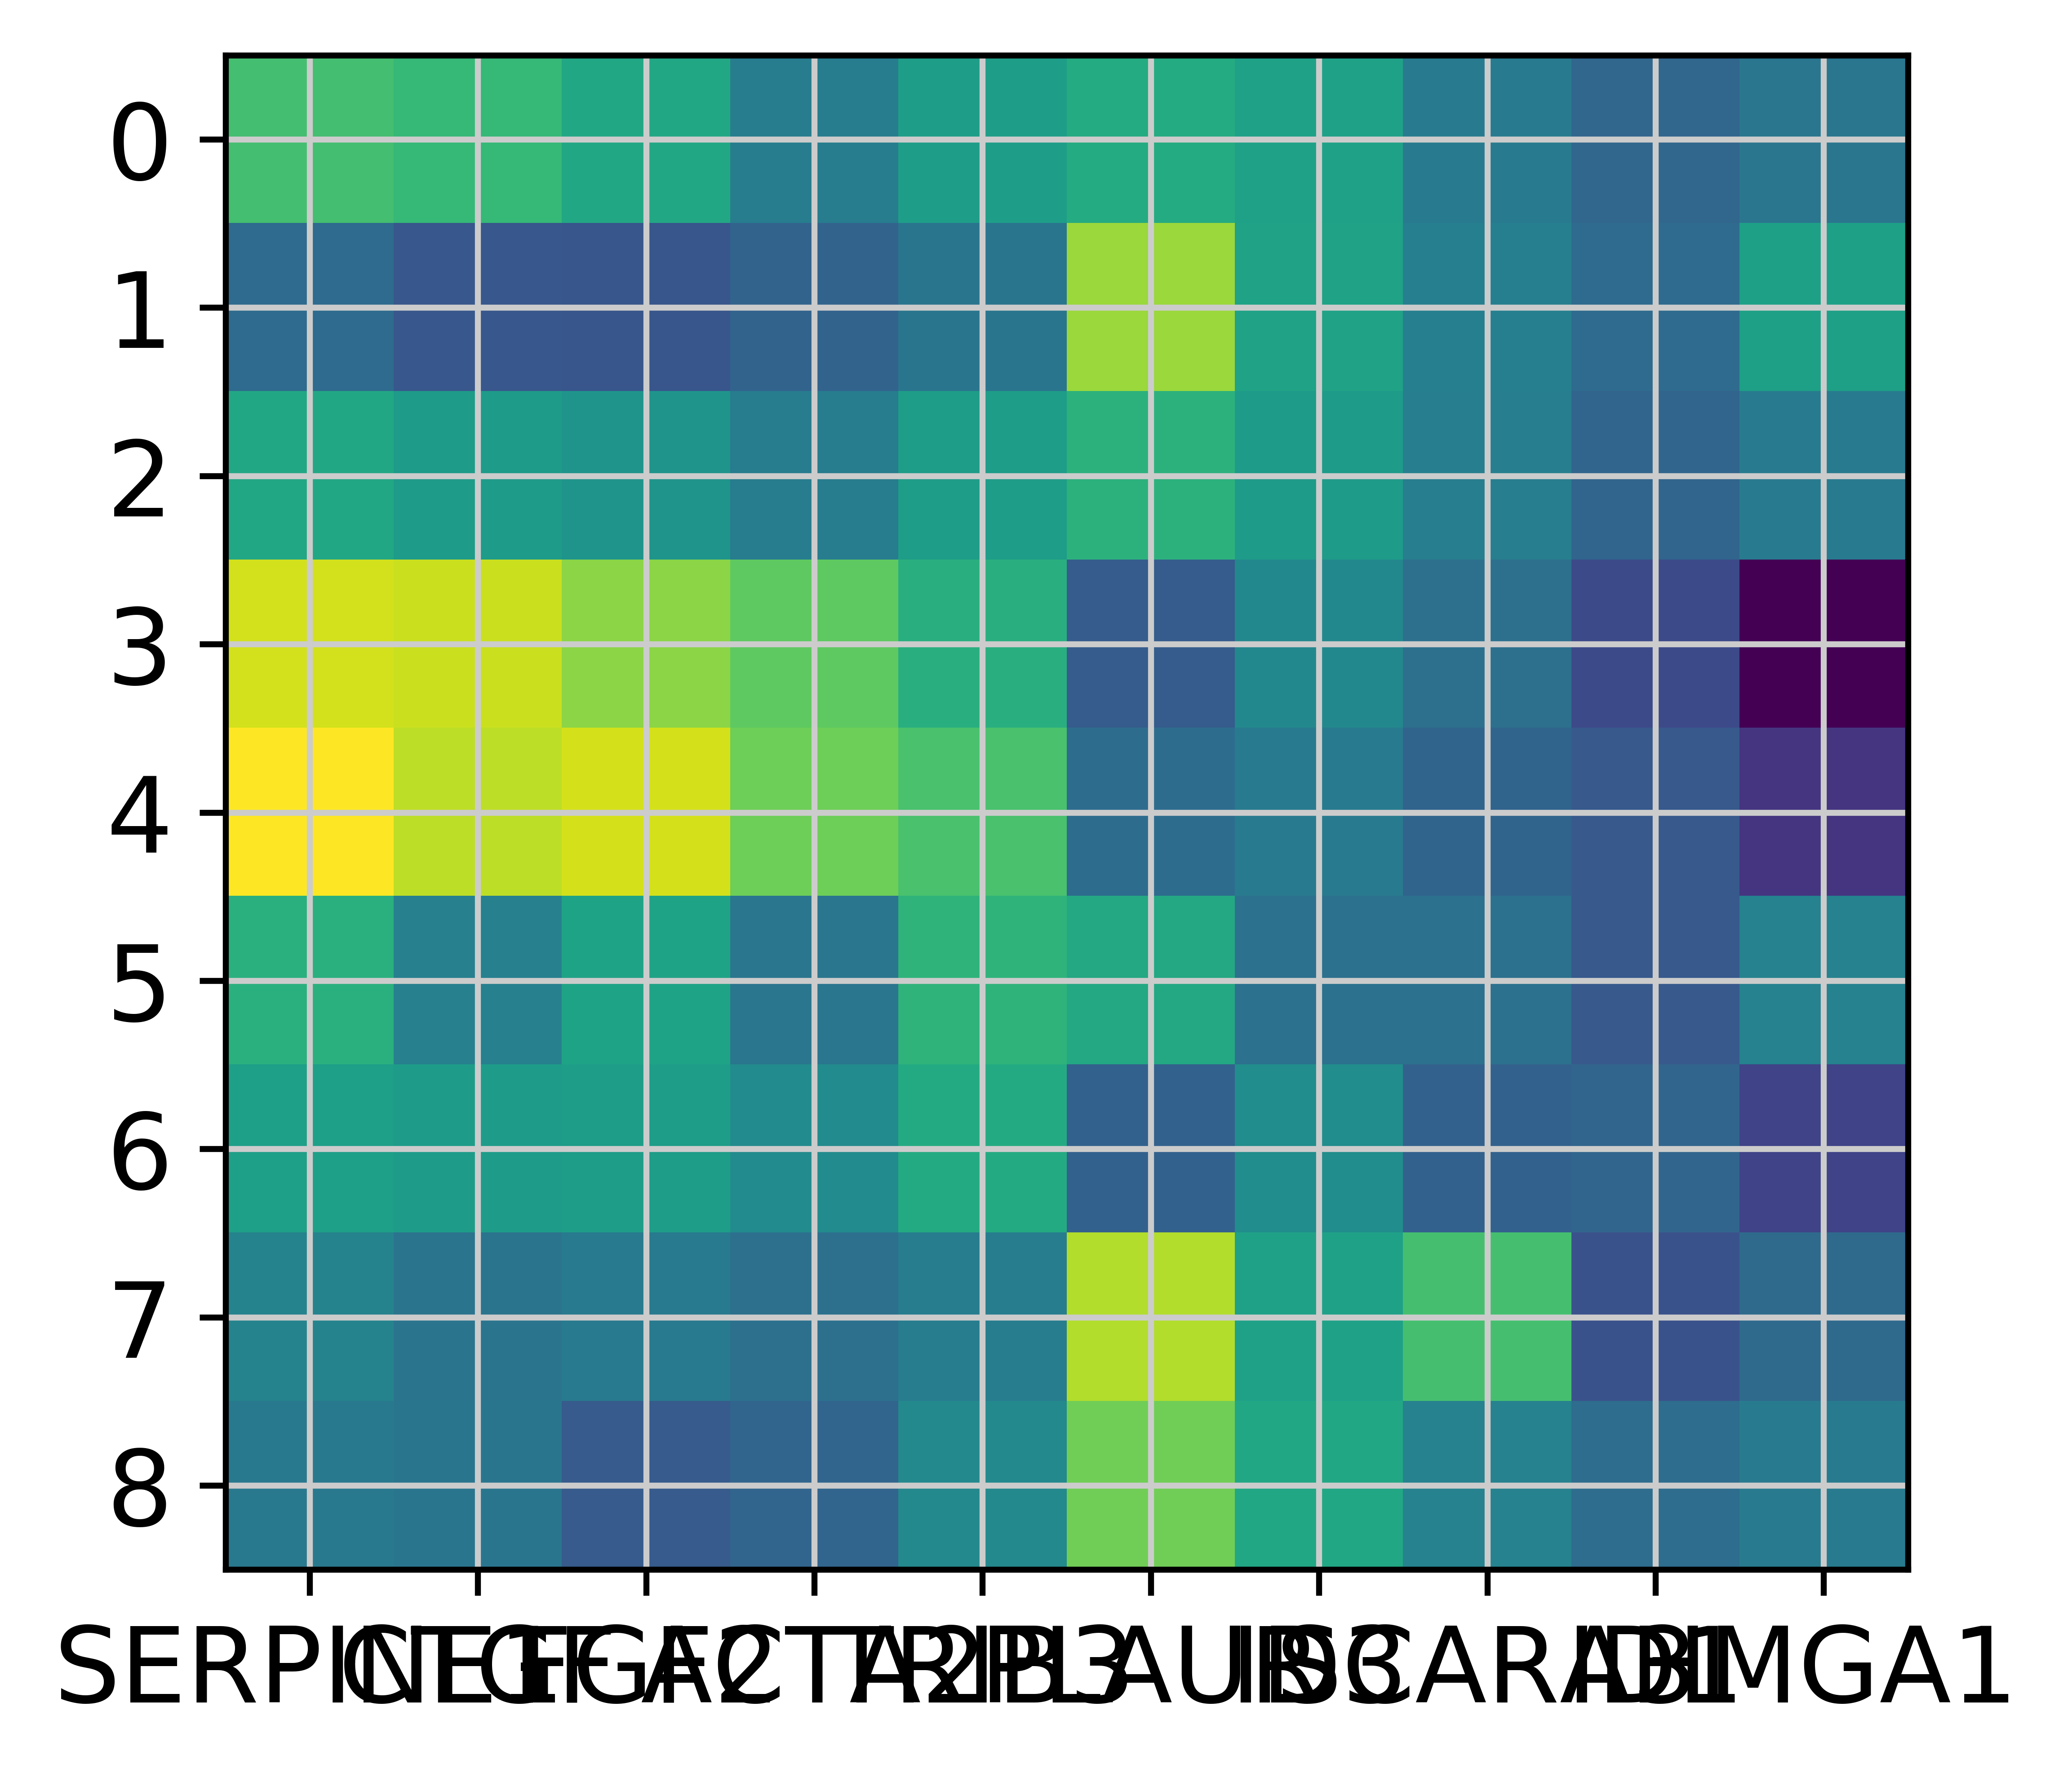

In [28]:
fig, ax = plt.subplots()
im = ax.imshow(cumulative)
louvain = range(len(louvain_counts))
# We want to show all ticks...
ax.set_xticks(np.arange(len(genes)))
ax.set_yticks(np.arange(len(louvain)))
# ... and label them with the respective list entries
ax.set_xticklabels(genes)
ax.set_yticklabels(louvain)